In [19]:
import os

# List everything in your training folder
print(os.listdir('runs/detect/train11'))


['val_batch0_pred.jpg', 'train_batch1.jpg', 'results.png', 'confusion_matrix.png', 'train_batch2041.jpg', 'train_batch2042.jpg', 'labels.jpg', 'PR_curve.png', 'train_batch2.jpg', 'P_curve.png', 'events.out.tfevents.1743772720.yukta.19989.1', 'results.csv', 'R_curve.png', 'val_batch0_labels.jpg', 'val_batch2_pred.jpg', 'train_batch0.jpg', 'args.yaml', 'F1_curve.png', 'confusion_matrix_normalized.png', 'val_batch2_labels.jpg', 'train_batch2040.jpg', 'val_batch1_pred.jpg', 'val_batch1_labels.jpg', 'weights', 'labels_correlogram.jpg']


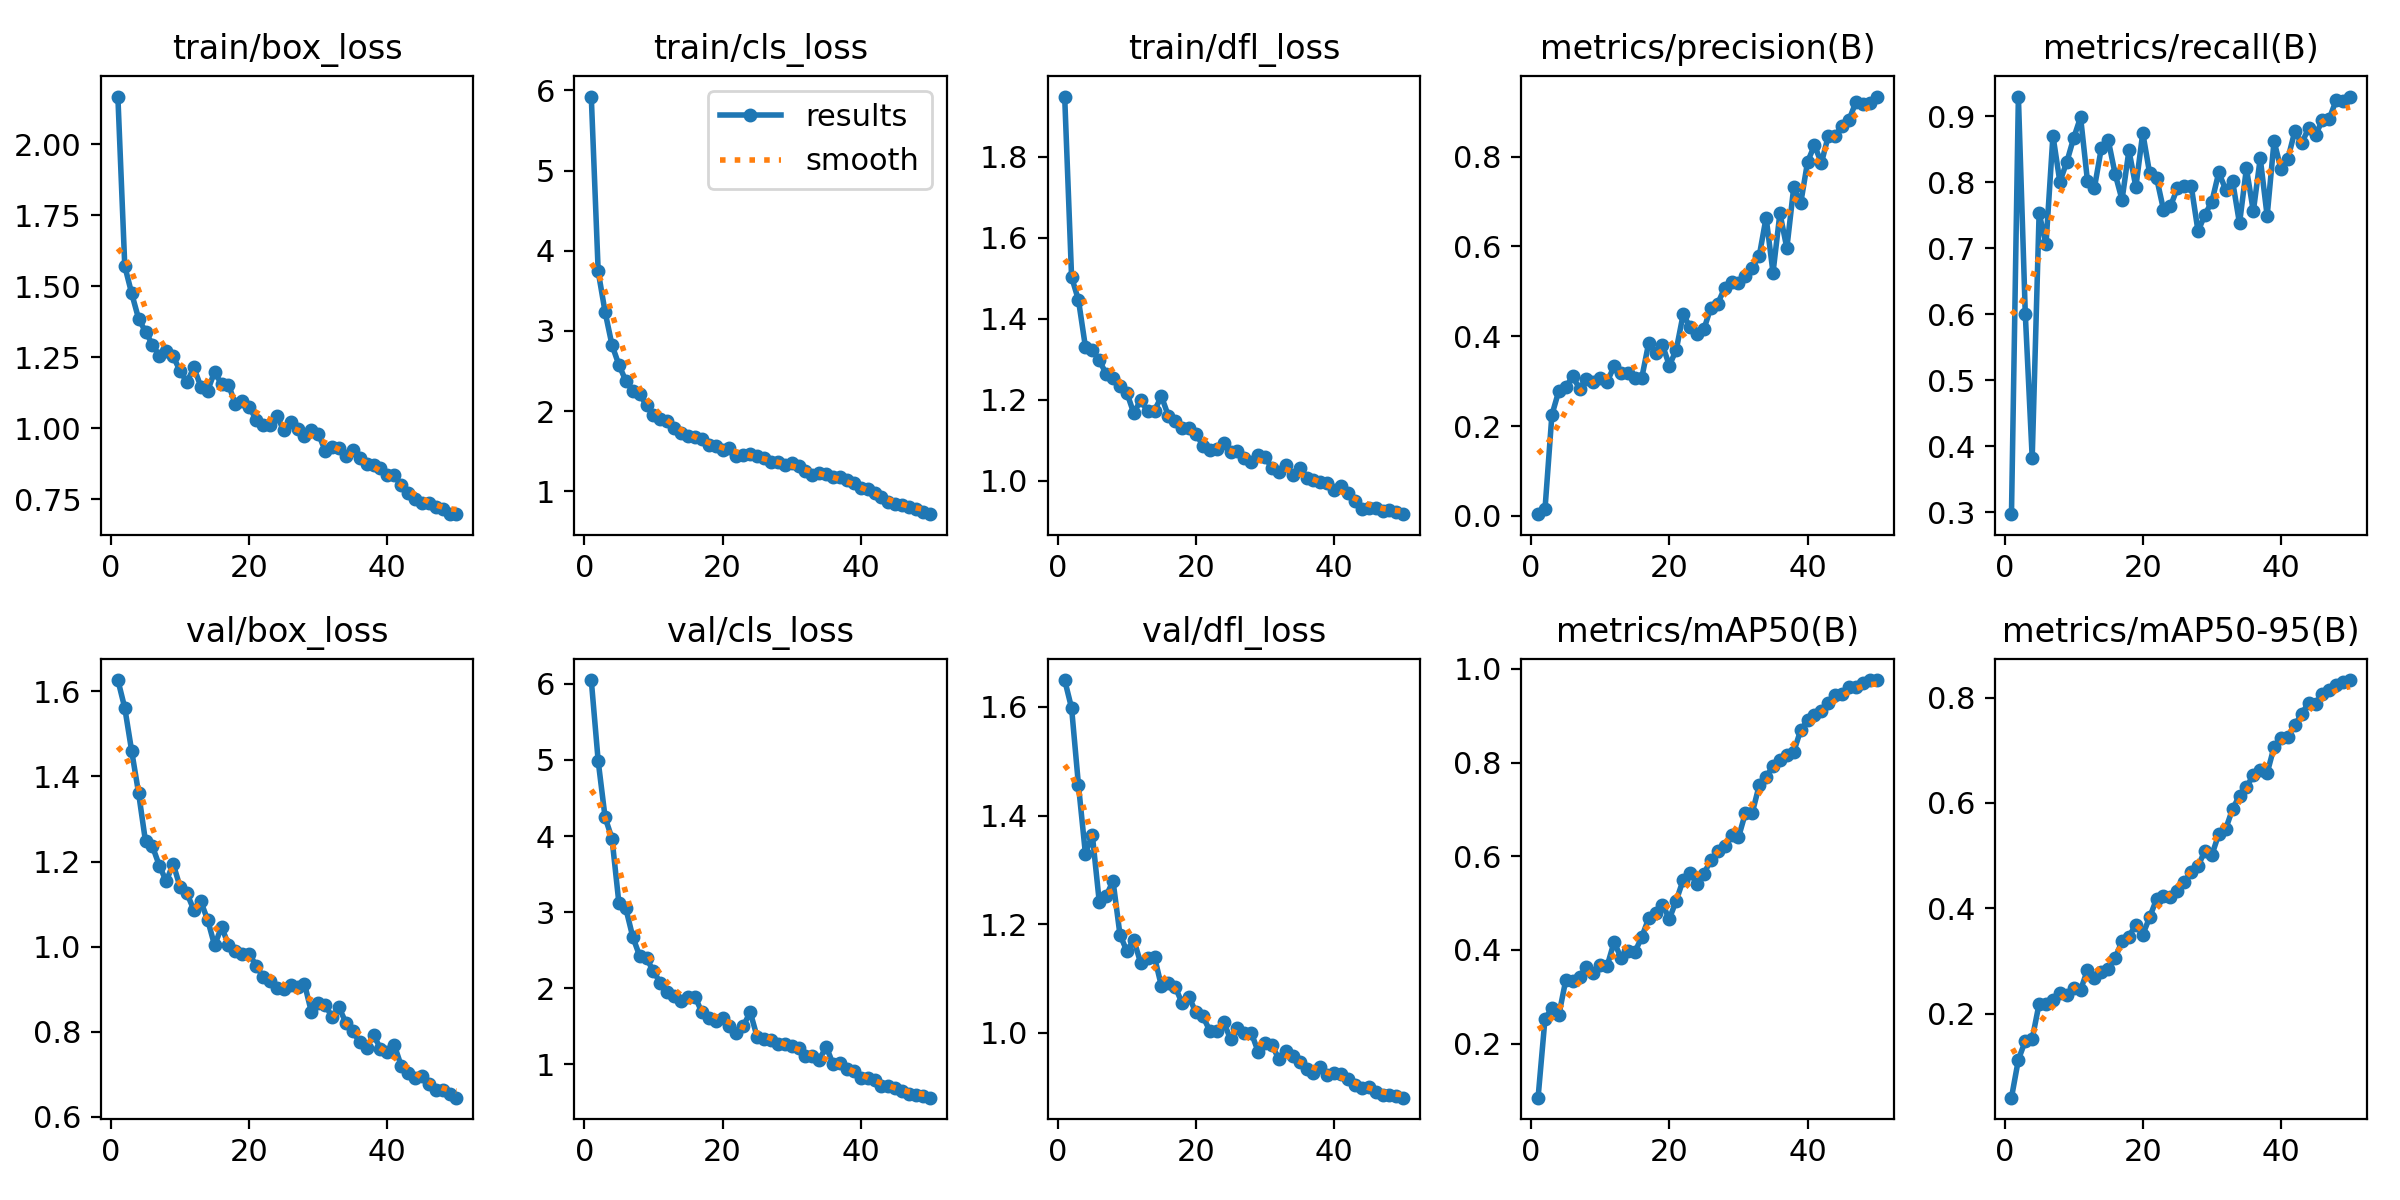

In [20]:
from IPython.display import Image
Image(filename='runs/detect/train11/results.png')


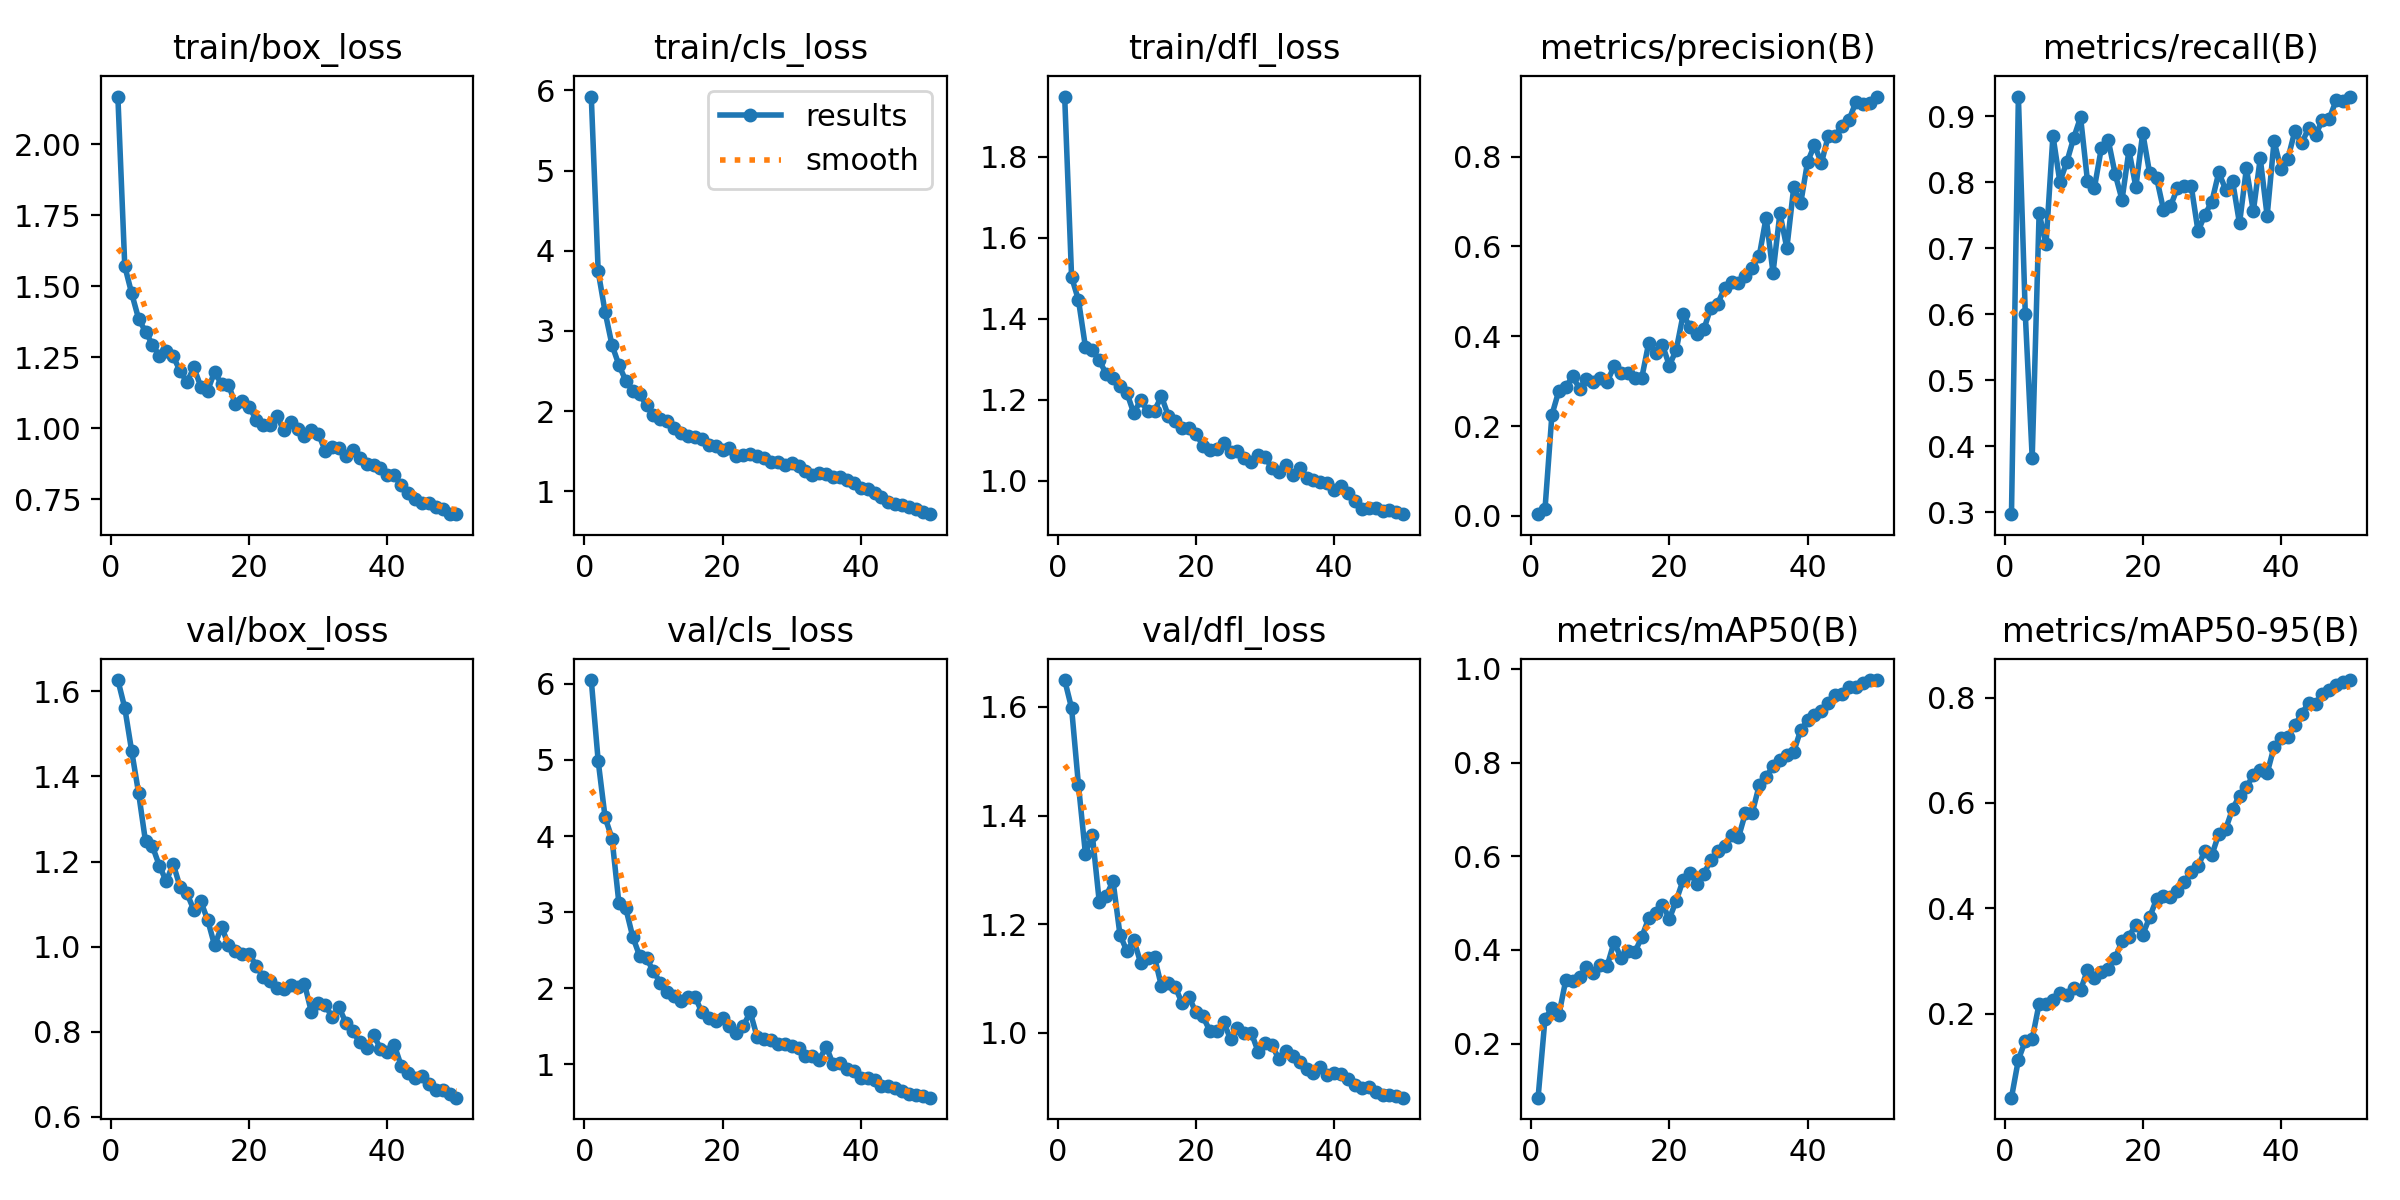

In [21]:
from IPython.display import Image

# Path to YOLO training result image (change path if needed)
Image(filename='runs/detect/train11/results.png')


In [22]:
from ultralytics.utils.plotting import plot_results

# Manually generate training curves from results.csv
plot_results('runs/detect/train11/results.csv')


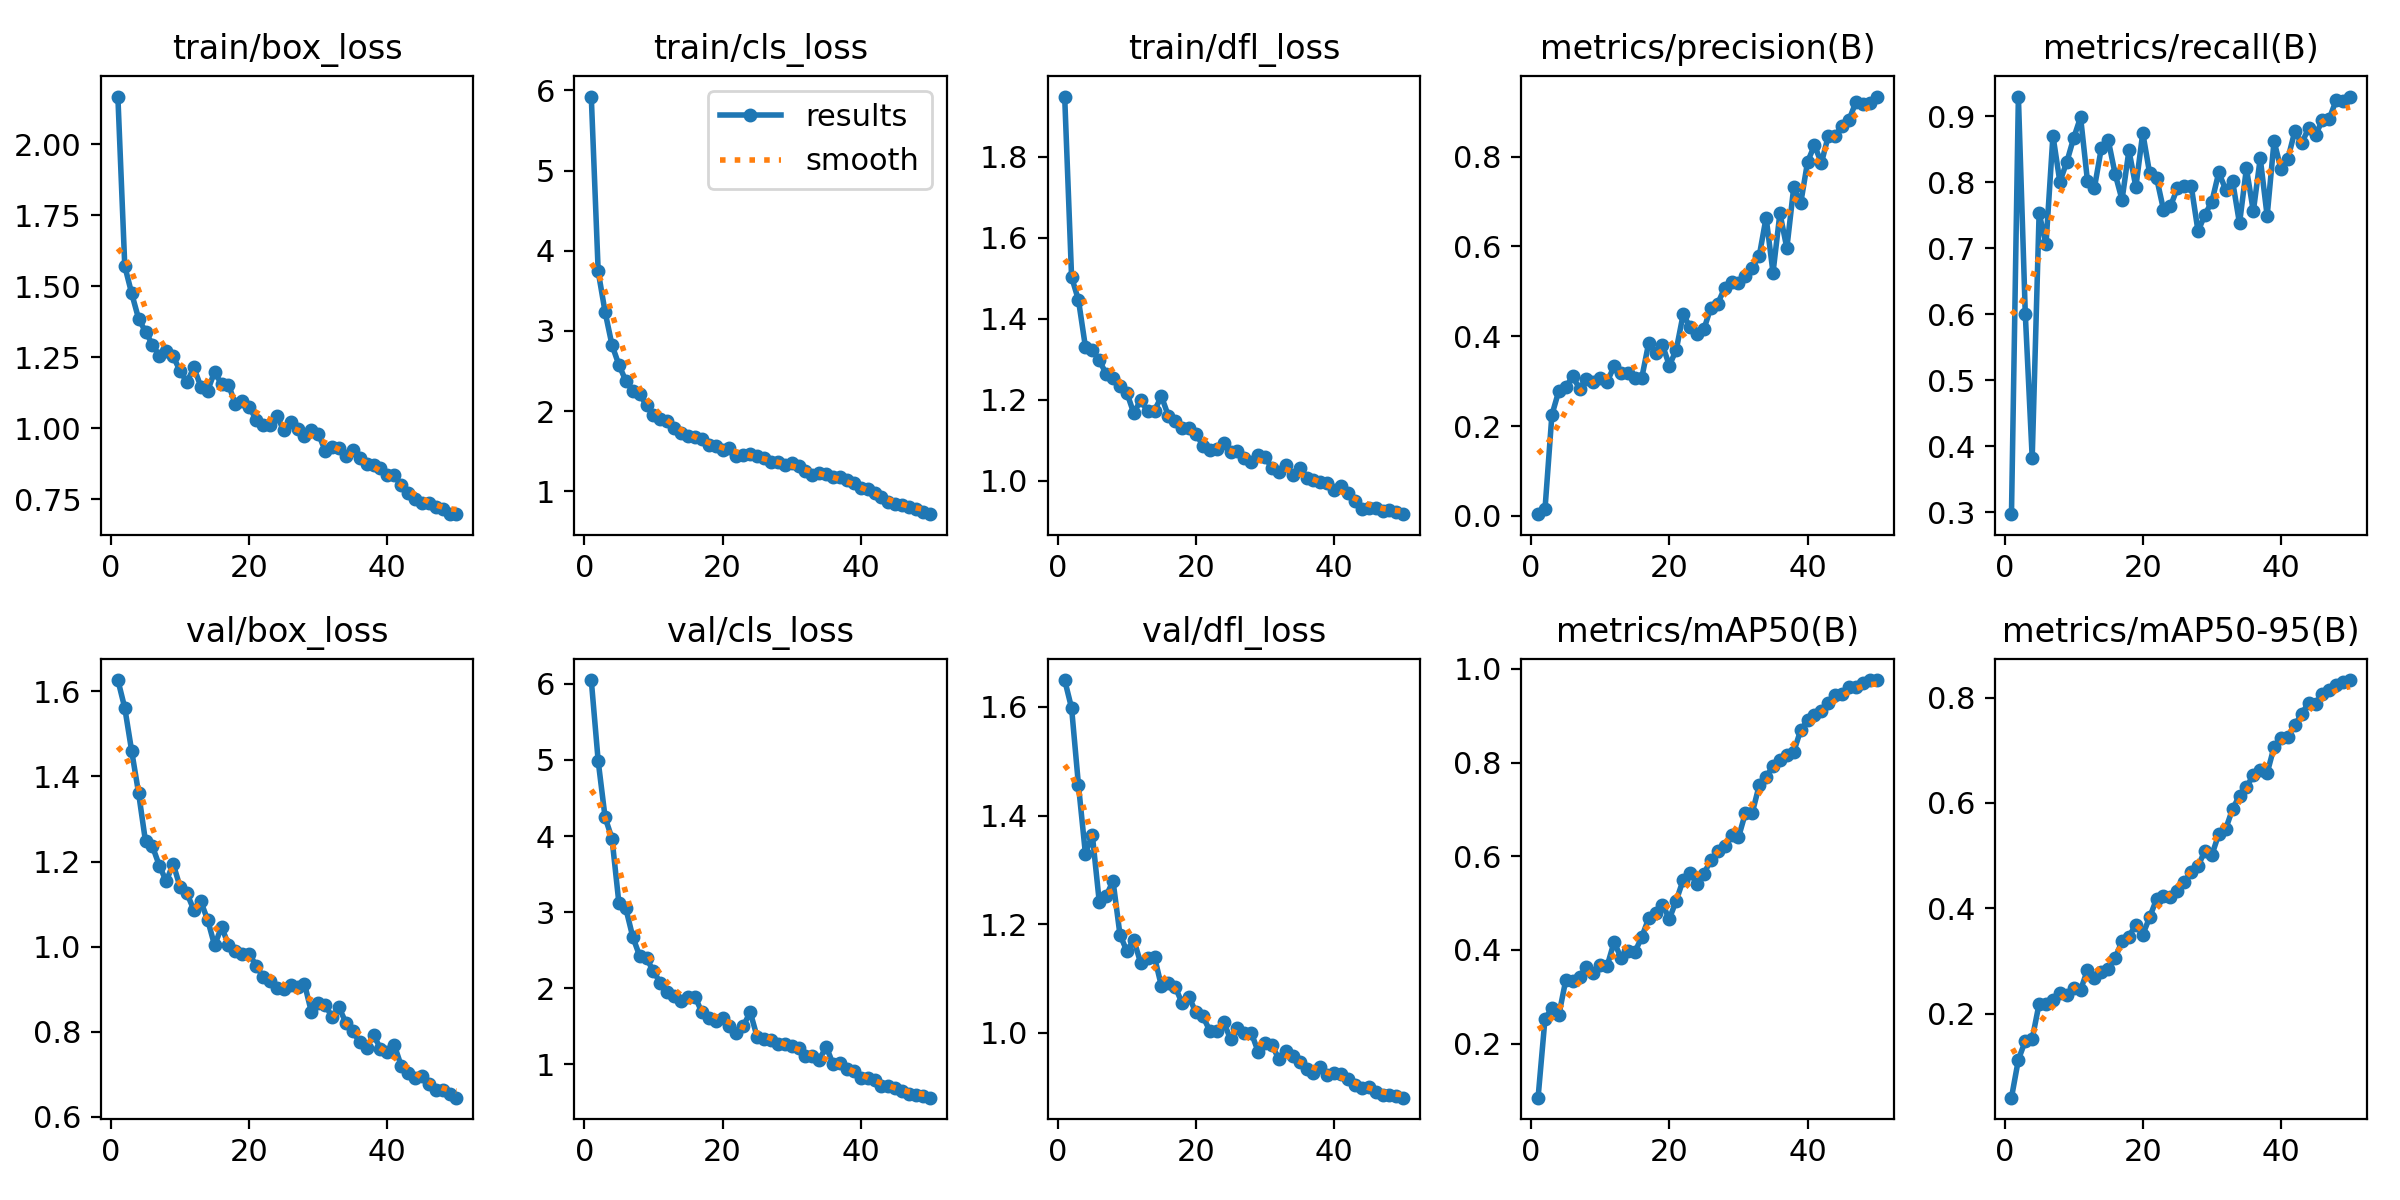

In [23]:
from IPython.display import Image
Image(filename='runs/detect/train11/results.png')


In [8]:
import os
os.listdir('runs/detect/train11')


['train_batch1.jpg',
 'results.png',
 'labels.jpg',
 'train_batch2.jpg',
 'events.out.tfevents.1743772720.yukta.19989.1',
 'results.csv',
 'train_batch0.jpg',
 'args.yaml',
 'weights',
 'labels_correlogram.jpg']

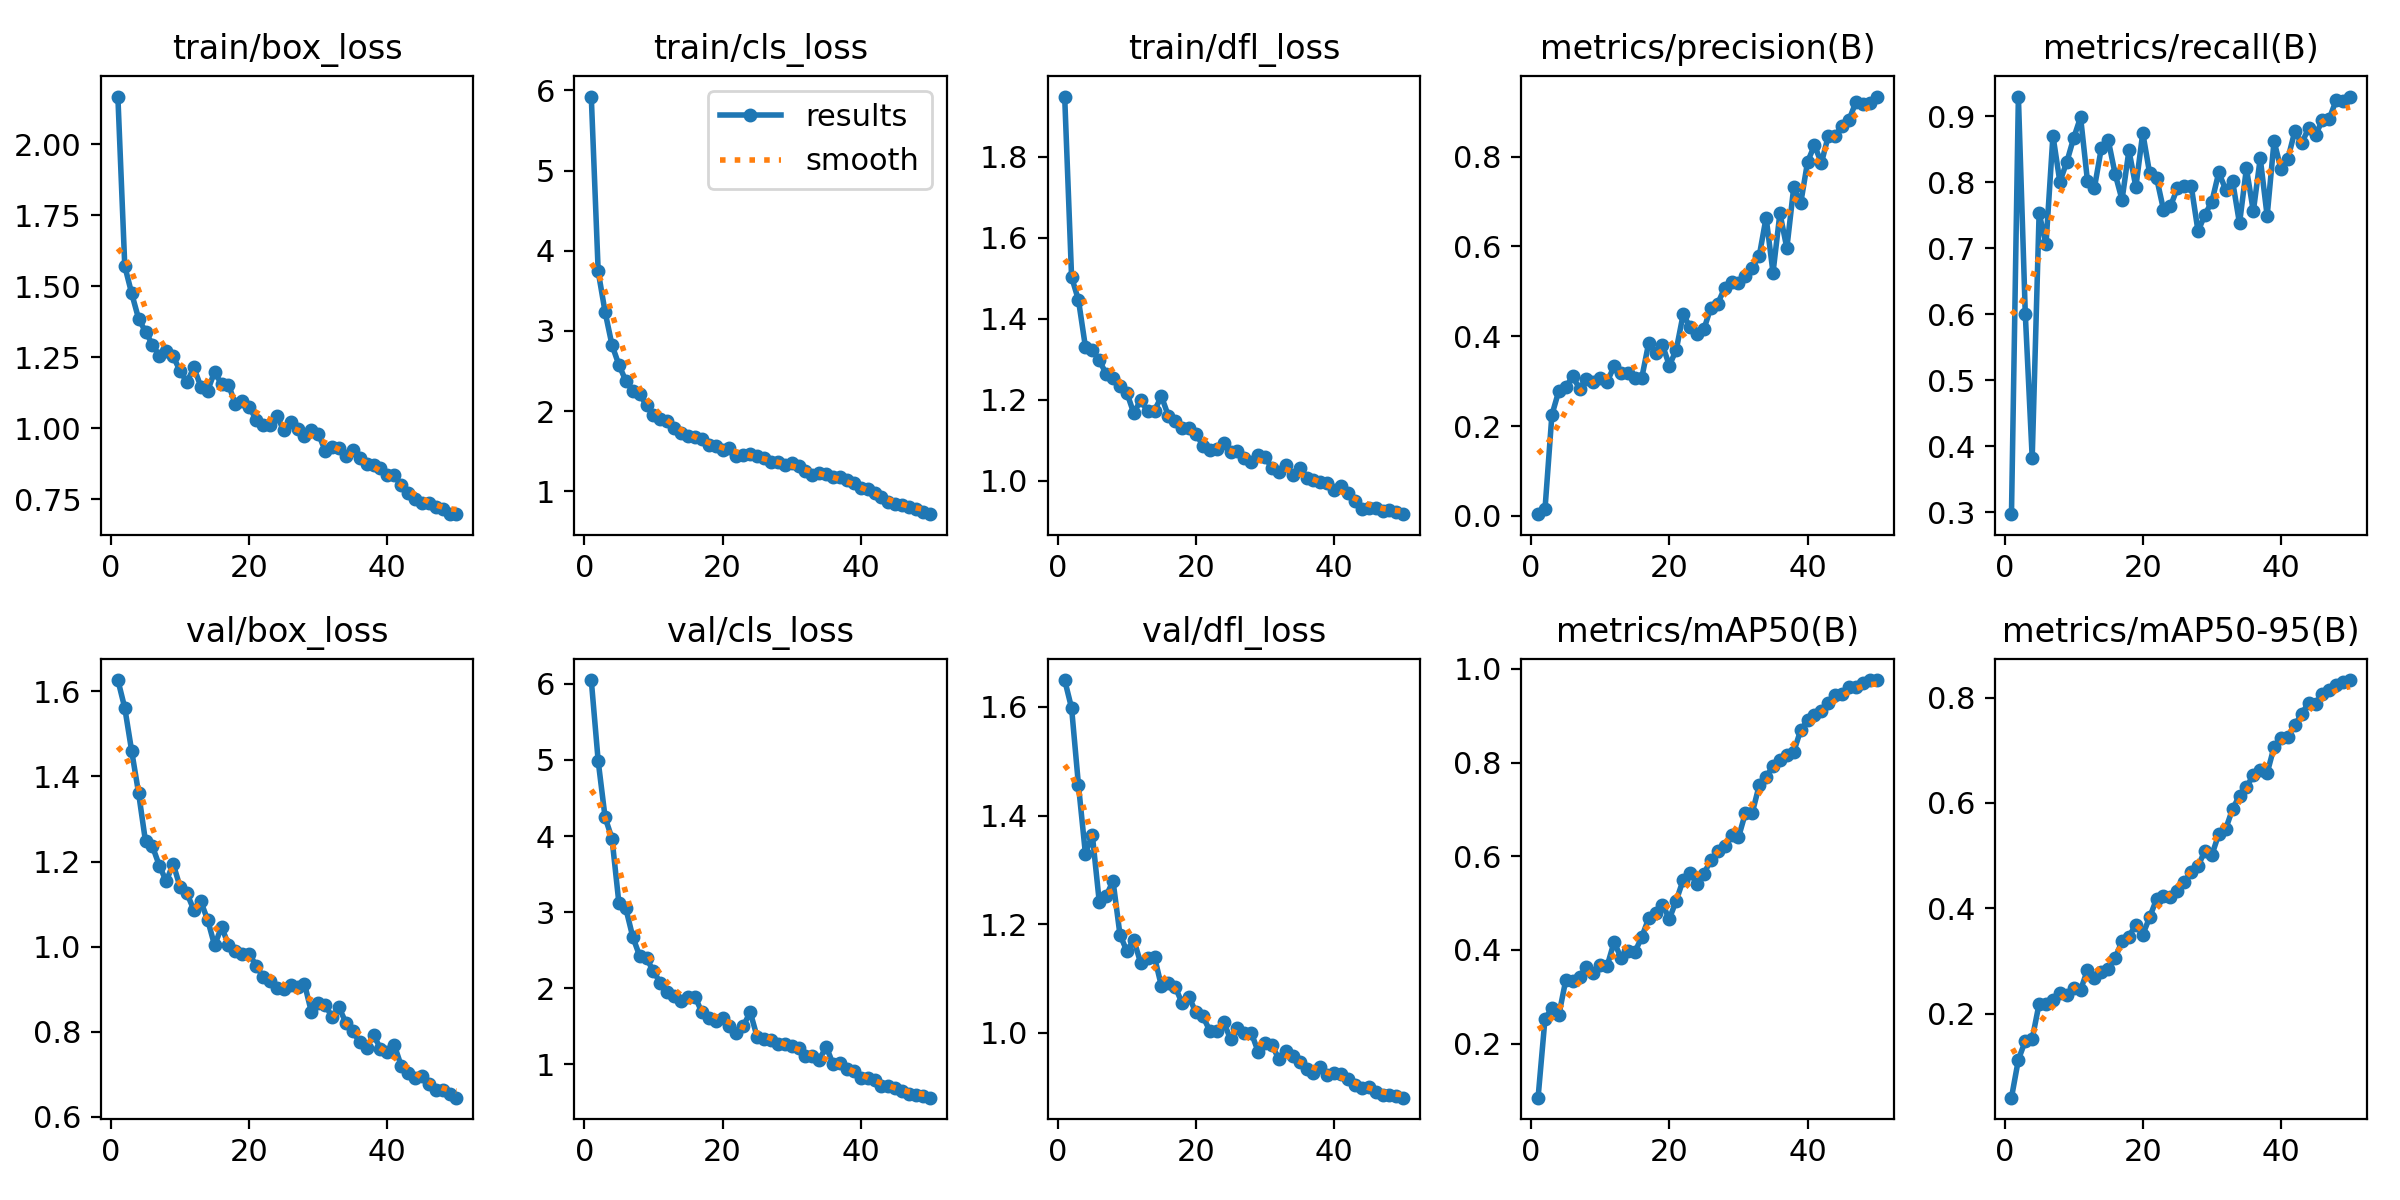

In [24]:
from IPython.display import Image
Image(filename='runs/detect/train11/results.png')


In [10]:
os.listdir('runs/detect/train11/weights')


['best.pt', 'last.pt']

In [11]:
from ultralytics import YOLO

In [14]:
model = YOLO("/home/yukta/devel/wip/AIML/ultrasound-analysis/notebooks/runs/detect/train11/weights/best.pt")
metrics = model.val(data="/home/yukta/devel/wip/AIML/ultrasound-analysis/data/dataset.yaml")  # Must match your dataset YAML

Ultralytics 8.3.101 🚀 Python-3.13.2 torch-2.6.0+cu124 CPU (AMD Ryzen 7 5700U with Radeon Graphics)
Model summary (fused): 72 layers, 3,007,403 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /home/yukta/devel/wip/AIML/ultrasound-analysis/data/labels/train.cache... 598 images, 214 backgrounds, 0 corrupt: 100%|██████████| 812/812 [00:00<
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:54<00:00,  1.08s/it]


                   all        812        598      0.934      0.927      0.976      0.833
               thalami        173        173      0.924      0.917      0.972      0.851
              midbrain        214        214      0.932      0.898      0.975      0.798
                palate        211        211      0.944      0.964      0.982      0.851
Speed: 1.8ms preprocess, 57.2ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/val


In [15]:

print(metrics)  # Includes precision, recall, mAP etc.

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f984e012900>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [25]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

In [27]:

# Load the model
model = YOLO("/home/yukta/devel/wip/AIML/ultrasound-analysis/notebooks/runs/detect/train11/weights/best.pt")

In [28]:
# Evaluate model on validation set
results = model.val(data="/home/yukta/devel/wip/AIML/ultrasound-analysis/data/dataset.yaml")

Ultralytics 8.3.101 🚀 Python-3.13.2 torch-2.6.0+cu124 CPU (AMD Ryzen 7 5700U with Radeon Graphics)
Model summary (fused): 72 layers, 3,007,403 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /home/yukta/devel/wip/AIML/ultrasound-analysis/data/labels/train.cache... 598 images, 214 backgrounds, 0 corrupt: 100%|██████████| 812/812 [00:00<
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:51<00:00,  1.01s/it]


                   all        812        598      0.934      0.927      0.976      0.833
               thalami        173        173      0.924      0.917      0.972      0.851
              midbrain        214        214      0.932      0.898      0.975      0.798
                palate        211        211      0.944      0.964      0.982      0.851
Speed: 1.7ms preprocess, 52.8ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/val2


In [32]:

# Extract metrics from results
metrics = results.results_dict  # This is the correct way now

precision = metrics['metrics/precision(B)']
recall = metrics['metrics/recall(B)']
map50 = metrics['metrics/mAP50(B)']
map5095 = metrics['metrics/mAP50-95(B)']

In [33]:

# Print in percentage
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"mAP@0.5: {map50 * 100:.2f}%")
print(f"mAP@0.5:0.95: {map5095 * 100:.2f}%")

Precision: 93.36%
Recall: 92.65%
mAP@0.5: 97.60%
mAP@0.5:0.95: 83.31%


In [34]:

# Plot the metrics
labels = ['Precision', 'Recall', 'mAP@0.5', 'mAP@0.5:0.95']
values = [precision * 100, recall * 100, map50 * 100, map5095 * 100]

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=["skyblue", "orange", "green", "purple"])
plt.ylim(0, 100)
plt.ylabel("Percentage (%)")
plt.title("YOLOv8 Model Evaluation Metrics")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 1 Axes>

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import streamlit as st
import json
import os

In [ ]:

sv_path = "notebooks/runs/detect/train11/results.csv"
if os.path.exists(csv_path):
    df = pd.read_csv(csv_path)
    last_epoch = df.iloc[-1]


In [ ]:



    precision = last_epoch['metrics/precision(B)']
    recall = last_epoch['metrics/recall(B)']
    map50 = last_epoch['metrics/mAP50(B)']
    map50_95 = last_epoch['metrics/mAP50-95(B)']





